In [262]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [255]:
files=set(os.listdir('./aclImdb/train/pos'))

In [256]:
df=pd.DataFrame(columns=['review','sentiment'],index=[int(str(i).split('_')[0]) for i in files])

In [257]:
for i in files:
    try:
        file=open('./aclImdb/train/pos/'+i).read()
        id_s,rating=str(i).split('_')[0],str(i).split('_')[1].split('.')[0]
        df['review'].loc[int(id_s)]=file
        df['sentiment'].loc[int(id_s)]=rating
    except:
        print(i)

8263_9.txt
11351_9.txt
9107_7.txt
5343_8.txt
1990_10.txt
11668_7.txt
2362_9.txt
10327_7.txt
4942_7.txt
2538_10.txt
12467_7.txt


In [258]:
df.to_csv('movie_data.csv',index=False)

In [523]:
df=pd.read_csv('movie_data.csv')

In [524]:
df.dropna(inplace=True)

In [525]:
def convert_encoding(x):
    text='0'*(int(x)-1)+'1'+'0'*(10-int(x))
    return text

[]

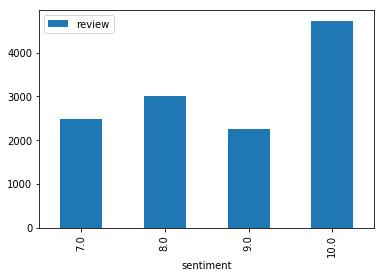

In [526]:
df.groupby('sentiment').count().plot.bar()
plt.plot()

In [527]:
df['sentiment']=df['sentiment'].map(convert_encoding)

In [528]:
df=df.head(500)

In [529]:
df.head()

,review,sentiment
0,I bought this game on an impulse buy from walm...,0000000100
1,"This movie, to me, is about family. Jimmy Morr...",0000000010
2,At first glance I expected this film to be cra...,0000001000
3,The cast is different and now they took a diff...,0000000001
4,I've seen this movie twice with my teenagers w...,0000001000


In [530]:
y_arr={index:list(map(int,list(i))) for index,i in zip(df.index,df['sentiment'])}
trans_columns=["x_"+str(i) for i in range(1,len(y_arr[list(y_arr.keys())[0]])+1)]

In [531]:
trans_df=pd.DataFrame(list(y_arr.values()),columns=trans_columns,index=y_arr.keys())

In [532]:
df.head()

,review,sentiment
0,I bought this game on an impulse buy from walm...,0000000100
1,"This movie, to me, is about family. Jimmy Morr...",0000000010
2,At first glance I expected this film to be cra...,0000001000
3,The cast is different and now they took a diff...,0000000001
4,I've seen this movie twice with my teenagers w...,0000001000


In [533]:
trans_df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0


In [534]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [535]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['review'].values,trans_df.values,test_size=0.2)

In [536]:
tokenizer_obj = Tokenizer()
total_reviews = np.concatenate([np.array(X_train,dtype=str),np.array(X_test,dtype=str)])
tokenizer_obj.fit_on_texts(total_reviews)

In [537]:
max_length = max([len(str(s).split()) for s in total_reviews])

In [538]:
vocab_size=len(tokenizer_obj.index_word)+1

In [539]:
X_train_tokens=tokenizer_obj.texts_to_sequences(np.array(X_train,dtype=str))
X_test_tokens=tokenizer_obj.texts_to_sequences(np.array(X_test,dtype=str))

In [540]:
X_train_pad=pad_sequences(X_train_tokens,maxlen=max_length,padding='post')
X_test_pad=pad_sequences(X_test_tokens,maxlen=max_length,padding='post')

In [560]:
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding,Dropout,Conv1D,MaxPooling1D,Activation
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping

EMBEDDING_DIM=128

# Convolution
kernel_size = 5
filters = 64
pool_size = 3

# LSTM
lstm_output_size = 70

model=Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

early_stopping=EarlyStopping(patience=2,monitor='val_loss')

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [561]:
model.fit(X_train_pad,y_train,epochs=5,batch_size=100,validation_data=(X_test_pad,y_test),callbacks=[early_stopping])

D:\Software\Anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 400 samples, validate on 100 samples
Epoch 1/5
400/400 [==============================] - 171s 428ms/step - loss: 2.2756 - categorical_accuracy: 0.1825 - val_loss: 2.2233 - val_categorical_accuracy: 0.3600
Epoch 2/5
400/400 [==============================] - 42s 104ms/step - loss: 2.1582 - categorical_accuracy: 0.3600 - val_loss: 2.0427 - val_categorical_accuracy: 0.3600
Epoch 3/5
400/400 [==============================] - 56s 140ms/step - loss: 2.0219 - categorical_accuracy: 0.3675 - val_loss: 1.8535 - val_categorical_accuracy: 0.3600
Epoch 4/5
400/400 [==============================] - 60s 149ms/step - loss: 1.9769 - categorical_accuracy: 0.3475 - val_loss: 1.7763 - val_categorical_accuracy: 0.3600
Epoch 5/5
400/400 [==============================] - 45s 112ms/step - loss: 1.8526 - categorical_accuracy: 0.3475 - val_loss: 1.7354 - val_categorical_accuracy: 0.3600


In [562]:
preds=model.predict(X_test_pad)

In [563]:
# preds[preds>=0.5]=1
# preds[preds<0.5]=0
preds

array([[0.03921038, 0.02318271, 0.041412  , 0.04888294, 0.08486792,
        0.07885532, 0.12120844, 0.17074333, 0.12256578, 0.2690712 ],
       [0.03921038, 0.02318271, 0.04141199, 0.04888294, 0.08486789,
        0.07885531, 0.12120843, 0.17074332, 0.12256578, 0.2690712 ],
       [0.03921039, 0.02318272, 0.041412  , 0.04888295, 0.08486791,
        0.07885532, 0.12120844, 0.17074335, 0.12256578, 0.26907122],
       [0.03921038, 0.02318271, 0.041412  , 0.04888294, 0.08486792,
        0.07885532, 0.12120844, 0.17074333, 0.12256577, 0.2690712 ],
       [0.03921038, 0.02318271, 0.04141199, 0.04888295, 0.0848679 ,
        0.07885531, 0.12120843, 0.1707433 , 0.12256578, 0.26907122],
       [0.03921039, 0.02318271, 0.04141199, 0.04888295, 0.08486791,
        0.07885532, 0.12120843, 0.17074333, 0.12256579, 0.26907116],
       [0.03921038, 0.02318272, 0.041412  , 0.04888295, 0.08486791,
        0.07885532, 0.12120844, 0.17074332, 0.12256581, 0.26907125],
       [0.03921038, 0.02318271, 0.0414119

In [564]:
y_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0,

In [575]:
def convert_classes(val):
    count=np.argmax(val)+1
    return count

In [576]:
y_test_classes=list(map(lambda x:convert_classes(x),y_test))
pred_classes=list(map(lambda x:convert_classes(x),preds))

In [577]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classes,pred_classes))

              precision    recall  f1-score   support

           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00        19
          10       0.36      1.00      0.53        36

   micro avg       0.36      0.36      0.36       100
   macro avg       0.09      0.25      0.13       100
weighted avg       0.13      0.36      0.19       100



D:\Software\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


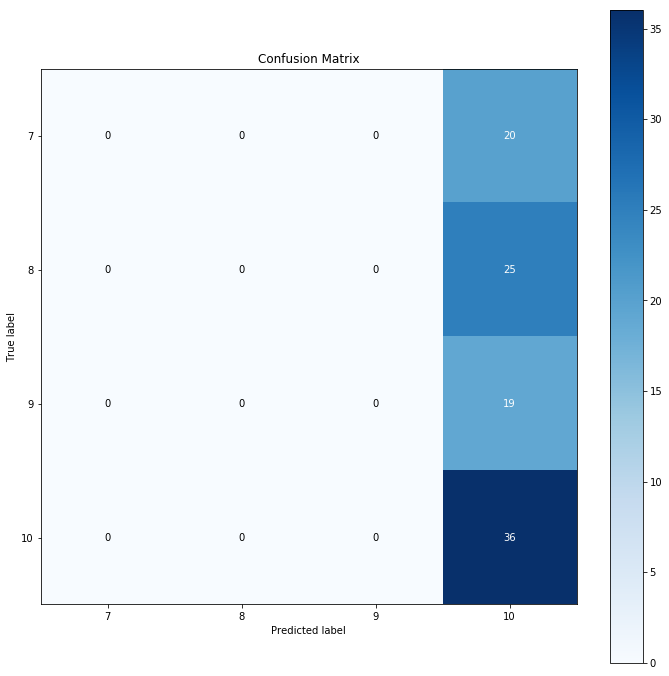

In [578]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test_classes, 
    pred_classes,
    figsize=(12,12))